In [1]:
# Libs

import numpy as np

import geopandas as gpd
from shapely.geometry import Polygon

# normalizar
from shapely.geometry import mapping
from sklearn.preprocessing import MinMaxScaler

# plots
import matplotlib.pyplot as plt


# Extração de shapes e Plots

- Extração de região geográfica de interesse (bbbike) no formato .shp
- Plot de shapes

In [2]:
# bbbike: https://extract.bbbike.org/
# use bbbike to obtain shape files

# Unicamp Shapes:
# landuse
# natural
# places
# points
# railways
# roads
# waterways
# buildings

unicamp_df = gpd.read_file('unicamp/shape/buildings.shp')

print('shape:', unicamp_df.shape)
unicamp_df.head()

shape: (509, 4)


,osm_id,name,type,geometry
0,95011154,IC 3,university,"POLYGON ((-47.06377 -22.81368, -47.06375 -22.8..."
1,95011157,Banco Santander,bank,"POLYGON ((-47.06880 -22.81689, -47.06881 -22.8..."
2,95011161,Ciclo Básico II,university,"POLYGON ((-47.07069 -22.81797, -47.07050 -22.8..."
3,95011169,IC - Instituto de Computação,university,"POLYGON ((-47.06520 -22.81481, -47.06452 -22.8..."
4,95011172,IC 3.5,university,"POLYGON ((-47.06422 -22.81356, -47.06417 -22.8..."


In [3]:
# crs - sistema refereência de coordenadas

# WGS 84 - sistema de coords mundial (degree)
unicamp_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

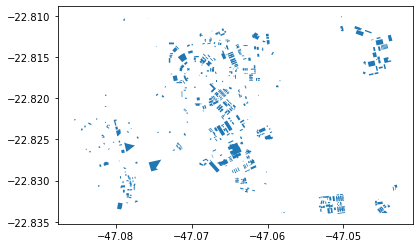

In [4]:
# Plot de mapa com WGS 84
ax = unicamp_df.plot(figsize=(12, 4))

,osm_id,name,type,geometry
3,95011169,IC - Instituto de Computação,university,"POLYGON ((-47.06520 -22.81481, -47.06452 -22.8..."


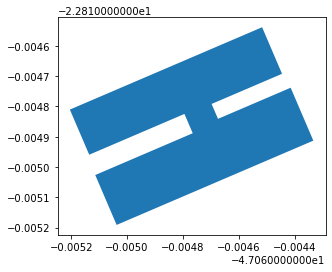

In [5]:
# Plot de mapa do IC (WGS 84)
ic_predio = unicamp_df.query('osm_id == 95011169')
ax = ic_predio.plot()
ic_predio.head()

# Conversão de CRS

Conversão de CRS WGS 84 para SIRGAS 2000 / UTM zone 23S , que é dado em metros e representa o sistemas de georeferência das Américas.

Características:

- Datum: SIRGAS 2000
- Projeção: UTM zone 23S (Campinas/SP)
- América Latina
- Hemisfério sul. 

Referências:
- https://epsg.io/31981
- https://spatialreference.org/ref/?search=31981
- https://pt.slideshare.net/JorgeSantos30/20141011-qgis24-sistemadereferenciadecoordenadas
- https://ocefpaf.github.io/python4oceanographers/blog/2013/12/16/utm/
- https://cursos.alura.com.br/forum/topico-erro-ao-reprojetar-usando-a-funcao-to_crs-77139


In [6]:
# Geodataframe dos Prédios da Unicamp
unicamp_dff = gpd.read_file('unicamp/shape/buildings.shp')
unicamp_df.head()

,osm_id,name,type,geometry
0,95011154,IC 3,university,"POLYGON ((-47.06377 -22.81368, -47.06375 -22.8..."
1,95011157,Banco Santander,bank,"POLYGON ((-47.06880 -22.81689, -47.06881 -22.8..."
2,95011161,Ciclo Básico II,university,"POLYGON ((-47.07069 -22.81797, -47.07050 -22.8..."
3,95011169,IC - Instituto de Computação,university,"POLYGON ((-47.06520 -22.81481, -47.06452 -22.8..."
4,95011172,IC 3.5,university,"POLYGON ((-47.06422 -22.81356, -47.06417 -22.8..."


In [7]:
# Conversão de WSG84 para SIRGAS 2000 / UTM one 23S : 31983 
# Zona 23 inclui Campinas

unicamp_utm_df = unicamp_dff.to_crs(31983)
unicamp_utm_df.crs

<Projected CRS: EPSG:31983>
Name: SIRGAS 2000 / UTM zone 23S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - 48°W to 42°W
- bounds: (-48.0, -33.5, -42.0, 5.13)
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

,osm_id,name,type,geometry
0,95011154,IC 3,university,"POLYGON ((288179.970 7475626.000, 288182.081 7..."
1,95011157,Banco Santander,bank,"POLYGON ((287668.651 7475263.188, 287667.599 7..."
2,95011161,Ciclo Básico II,university,"POLYGON ((287476.147 7475140.737, 287495.256 7..."
3,95011169,IC - Instituto de Computação,university,"POLYGON ((288034.700 7475498.723, 288104.976 7..."
4,95011172,IC 3.5,university,"POLYGON ((288134.073 7475638.141, 288139.036 7..."


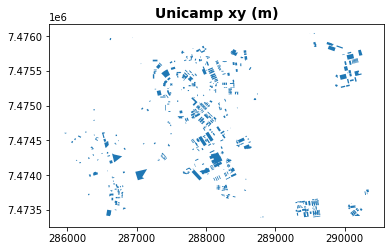

In [8]:
# Plot de mapa Convertido para SIRGAS 2000 / UTM zone 23S
ax = unicamp_utm_df.plot()
plt.title('Unicamp xy (m)',fontweight='bold',fontsize=14)

# Dataframe convertido
unicamp_utm_df.head()

# Normalização de Mapa da Unicamp

In [9]:
# Bounds of Unicamp Map
unicamp_minx, unicamp_miny, unicamp_maxx, unicamp_maxy = unicamp_utm_df.geometry.total_bounds

print('bounds:', unicamp_minx, unicamp_miny, unicamp_maxx, unicamp_maxy)
print('x:', unicamp_maxx-unicamp_minx)
print('y:', unicamp_maxy- unicamp_miny)


bounds: 285960.71918678837 7473387.272237044 290348.567447891 7476048.738107968
x: 4387.848261102627
y: 2661.465870924294


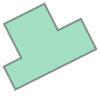

In [10]:
# get all geometries of unicamp_utm_df
unicamp_geometries = [i for i in unicamp_utm_df.geometry]

# geometry example
unicamp_geometries[0]

In [11]:
map_minx = 1e+10
map_maxx = -1
map_miny = 1e+10
map_maxy = -1

for geometry in range(len(unicamp_geometries)):
    
    # get all coordinates (x,y) of polygons in unicamp_utm_df
    all_coords_per_geometry = mapping(unicamp_geometries[geometry])["coordinates"] 

    # split all coordinates per geometry and get x coords and y coords
    x_coords = [all_coords_per_geometry[0][i][0] for i in range(len(all_coords_per_geometry[0]))]
    y_coords = [all_coords_per_geometry[0][i][1] for i in range(len(all_coords_per_geometry[0]))]
    
    # convert to 2D array
    x_coords = np.array(x_coords)
    y_coords = np.array(y_coords)
    
    # get all geometry coords in x and y
    if geometry == 0:
        all_coords_x = x_coords.copy()
        all_coords_y = y_coords.copy()
    else:
        all_coords_x = np.append (all_coords_x, x_coords.copy(), axis=0)
        all_coords_y = np.append (all_coords_y, y_coords.copy(), axis=0)
        
    # get bounds limits of map and compare with unicamp_utm_df.geometry.total_bounds
    # after for loop, limits must be equal
    if np.min(x_coords) < map_minx:
        map_minx = np.min(x_coords)
    if np.max(x_coords) > map_maxx:
        map_maxx = np.max(x_coords)
    
    if np.min(y_coords) < map_miny:
        map_miny = np.min(y_coords)
    if np.max(y_coords) > map_maxy:
        map_maxy = np.max(y_coords)
    

# after for loop, limits must be equal
print(map_minx, map_miny,map_maxx, map_maxy)
print(unicamp_minx, unicamp_miny, unicamp_maxx, unicamp_maxy)
# yey

# convert to 2D array 
x = np.array(all_coords_x).reshape(-1, 1) # reshape -> 2D array
y = np.array(all_coords_y).reshape(-1, 1)

285960.71918678837 7473387.272237044 290348.567447891 7476048.738107968
285960.71918678837 7473387.272237044 290348.567447891 7476048.738107968


In [12]:
# Teste de funcionamento da lógica de normalização
# teste com uma das geometrias (predios)

# for geometry in range(len(unicamp_geometries)):

#     # get all coordinates (x,y) of polygons in unicamp_utm_df
#     all_coords_per_geometry = mapping(unicamp_geometries[geometry])["coordinates"] 
    
#     # split all coordinates per geometry and get x coords and y coords
#     x_coords = [all_coords_per_geometry[0][i][0] for i in range(len(all_coords_per_geometry[0]))]
#     y_coords = [all_coords_per_geometry[0][i][1] for i in range(len(all_coords_per_geometry[0]))]
    
#     # convert to 2D array
#     x_coords = np.array(x_coords).reshape(-1, 1) 
#     y_coords = np.array(y_coords).reshape(-1, 1)
    
#     # define limits of normalization
#     scaler_x = MinMaxScaler(feature_range = (0, unicamp_maxx - unicamp_minx))
#     scaler_y = MinMaxScaler(feature_range = (0, unicamp_maxy - unicamp_miny))
    
#     # normalize with all all geometry coords x 
#     scaler_x.fit(x)
#     transform_x = scaler_x.transform(x_coords)
    
#     # normalize with all all geometry coords y
#     scaler_y.fit(y)
#     transform_y = scaler_y.transform(y_coords)
    
#     # convert np array x and y to polygon
#     newArray = np.append (transform_x, transform_y, axis=1)
#     new_polygon = Polygon(newArray)
#     print('Rescale polygon:\n\n', new_polygon)
#     break

    
# # check building bounds    
# building = gpd.GeoSeries(new_polygon)
# building.plot(color='Green')

# a,b,c,d = building.total_bounds
# print('\nx:',c-a, 'm')
# print('y:',d-b, 'm')

In [13]:
# create a normalized map with unicamp bounds

# criando novo mapa, que conterá geometrias normalizadas
mapa_normalizado = gpd.GeoDataFrame(columns=["geometry"])
mapa_normalizado['osm_id'] = unicamp_utm_df['osm_id']
mapa_normalizado['name'] = unicamp_utm_df['name']
mapa_normalizado['tyoe'] = unicamp_utm_df['type']

# processo de normalização
for geometry in range(len(unicamp_geometries)):

    # get all coordinates (x,y) of polygons in unicamp_utm_df
    all_coords_per_geometry = mapping(unicamp_geometries[geometry])["coordinates"] 
    
    # split all coordinates per geometry and get x coords and y coords
    x_coords = [all_coords_per_geometry[0][i][0] for i in range(len(all_coords_per_geometry[0]))]
    y_coords = [all_coords_per_geometry[0][i][1] for i in range(len(all_coords_per_geometry[0]))]
    
    # convert to 2D array
    x_coords = np.array(x_coords).reshape(-1, 1) 
    y_coords = np.array(y_coords).reshape(-1, 1)
    
    # define limits of normalization
    scaler_x = MinMaxScaler(feature_range = (0, unicamp_maxx - unicamp_minx))
    scaler_y = MinMaxScaler(feature_range = (0, unicamp_maxy - unicamp_miny))
    
    # normalize with all all geometry coords x 
    scaler_x.fit(x)
    transform_x = scaler_x.transform(x_coords)
    
    # normalize with all all geometry coords y
    scaler_y.fit(y)
    transform_y = scaler_y.transform(y_coords)
    
    # convert np array x and y normalized back to polygon
    building_geometry = np.append (transform_x, transform_y, axis=1)
    new_polygon = Polygon(building_geometry)
    
    mapa_normalizado.loc[geometry, 'geometry'] = new_polygon
    

print('Shape do Mapa normalizado:', mapa_normalizado.shape)
mapa_normalizado.head()

Shape do Mapa normalizado: (509, 4)


,geometry,osm_id,name,tyoe
0,"POLYGON ((2219.251 2238.728, 2221.362 2239.787...",95011154,IC 3,university
1,"POLYGON ((1707.932 1875.916, 1706.879 1871.880...",95011157,Banco Santander,bank
2,"POLYGON ((1515.427 1753.464, 1534.537 1769.617...",95011161,Ciclo Básico II,university
3,"POLYGON ((2073.981 2111.450, 2144.257 2142.551...",95011169,IC - Instituto de Computação,university
4,"POLYGON ((2173.354 2250.869, 2178.317 2240.382...",95011172,IC 3.5,university


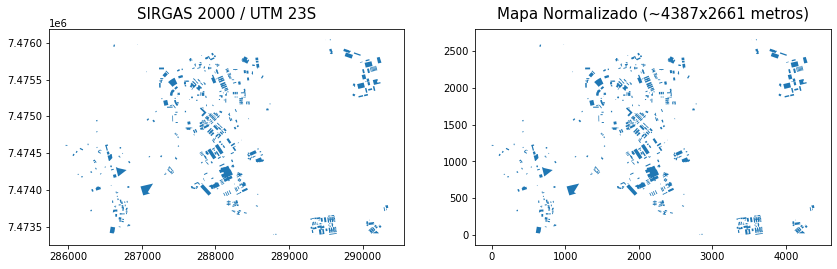

In [14]:
# ANTES E DEPOIS DA NORMALIZAÇÃO

fig, axes = plt.subplots(1,2, figsize = (14, 7)) # 1 linha, 2 colunas

# Mapa da unicamp no crs SIRGAS 2000/ UTM 23S
axes[0].set_title('SIRGAS 2000 / UTM 23S', fontsize=15, y=1.02)
unicamp_utm_df.plot(ax=axes[0])

# Mapa da Unicamp
# onde:
# - unicamp bounds = 285960.71918678837 7473387.272237044 290348.567447891 7476048.738107968
# - maxx - minx    = 4387.848261102627
# - maxy - miny    = 2661.465870924294
axes[1].set_title('Mapa Normalizado (~4387x2661 metros)', fontsize=15, y=1.02)
mapa_normalizado.plot(ax=axes[1])

plt.show()

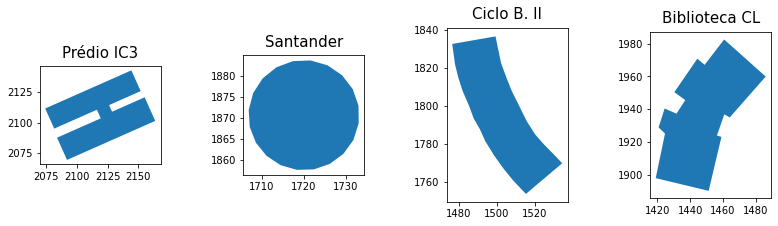

In [15]:
# EXEMPLO DE PRÉDIOS NORMALIZADOS
mapa_normalizado.head()

# get buildings
ic_predio = mapa_normalizado.query('osm_id == 95011169')
santander = mapa_normalizado.query('osm_id == 95011157')
cbII_predio = mapa_normalizado.query('osm_id == 95011161')
biblioteca = mapa_normalizado.query('osm_id == 95463723')

# plot buildings
fig, axes = plt.subplots(1,4, figsize = (12, 5)) # 2 linha, 2 colunas

# Mapa da unicamp no crs SIRGAS 2000/ UTM 23S
axes[0].set_title('Prédio IC3', fontsize=15, y=1.02)
ic_predio.plot(ax=axes[0])

axes[1].set_title('Santander', fontsize=15, y=1.02)
santander.plot(ax=axes[1])

axes[2].set_title('Ciclo B. II', fontsize=15, y=1.02)
cbII_predio.plot(ax=axes[2])

axes[3].set_title('Biblioteca CL', fontsize=15, y=1.02)
biblioteca.plot(ax=axes[3])

# space between subplots
fig.tight_layout(pad=5.0)

plt.show()

# Google Maps: https://www.google.com/maps/place/Coordenadoria+de+P%C3%B3s-gradua%C3%A7%C3%A3o+-+Instituto+de+Biologia+%2F+Unicamp/@-22.8174874,-47.069779,253m/data=!3m1!1e3!4m5!3m4!1s0x0:0x5970884374643347!8m2!3d-22.8194777!4d-47.0698417